# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [5]:
def q1():
    # gera amostra
    amostra = get_sample(athletes, "height", n=3000)
    
    # realiza o teste de shapiro-wilk
    teste = sct.shapiro(amostra)
    
    # obtem o resultado
    if (teste[1] < 0.05):
        resultado = False
    else:
        resultado = True
    
    return resultado
    pass

In [6]:
# testa a função
q1()

False

O resultado do teste indica que a distribuição não é Normal.

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [7]:
# resultado do teste
amostra = get_sample(athletes, "height", n=3000)
sct.shapiro(amostra)

(0.9961519837379456, 5.681722541339695e-07)

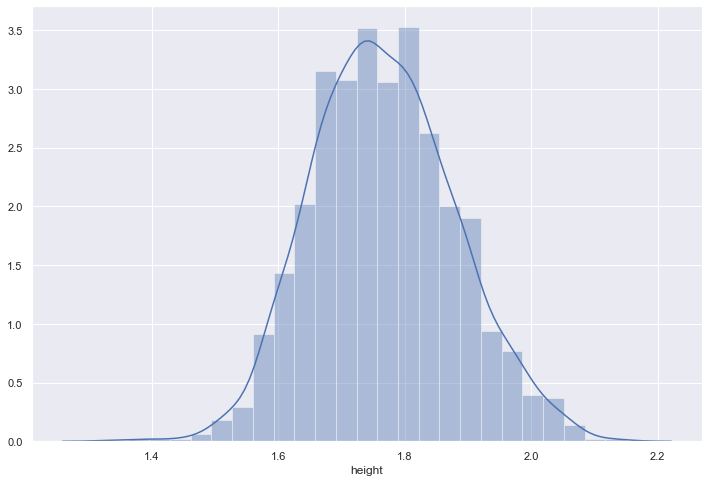

In [8]:
# histograma
sns.distplot(amostra,bins=25)

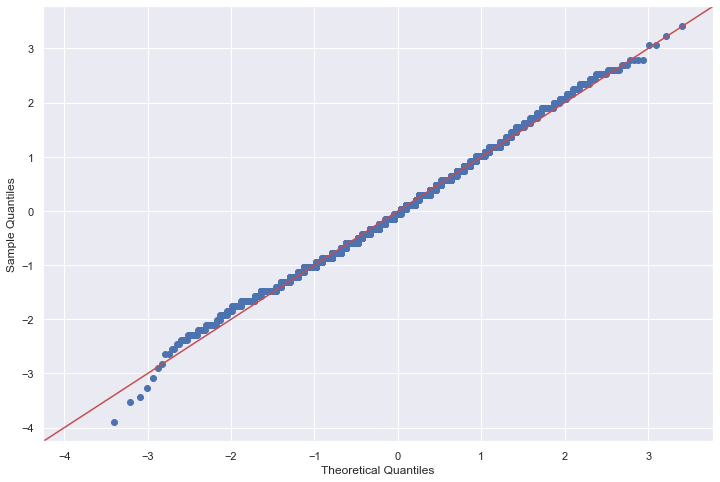

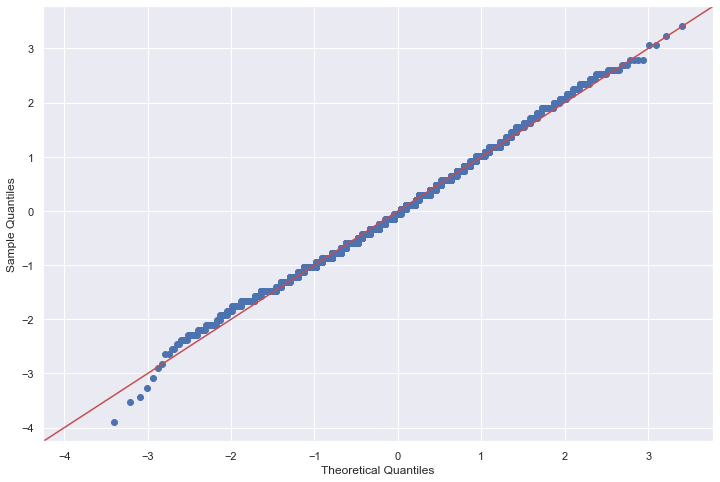

In [9]:
# qqplot
sm.qqplot(amostra, fit=True, line="45")

O histograma e o qqplot mostram uma distribuição muito similar à Normal.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [10]:
def q2():
    # gera amostra
    amostra = get_sample(athletes, "height", n=3000)
    
    # realiza o teste jarque-bera
    teste = sct.jarque_bera(amostra)
    
    # obtem o resultado
    if (teste[1] < 0.05):
        resultado = False
    else:
        resultado = True
    
    return resultado
    pass

In [11]:
# testa a função
q2()

False

In [12]:
# resultado do teste
sct.jarque_bera(amostra)

(13.03363513594265, 0.001478366424594868)

O teste Jarque-Bera chega à mesma conclusão do teste de Shapiro-Wilk: a distribuição não é Normal.

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [13]:
def q3():
    # gera amostra
    amostra2 = get_sample(athletes, "weight", n=3000)
    
    # realiza o teste de D'Agostino-Pearson
    teste = sct.normaltest(amostra2)
    
    # obtem o resultado
    if (teste[1] < 0.05):
        resultado = False
    else:
        resultado = True
    
    return resultado
    pass

In [14]:
# testa a função
q3()

False

In [15]:
# resultado do teste
amostra2 = get_sample(athletes, "weight", n=3000)
sct.normaltest(amostra2)

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

O teste de normalidade de D'Agostino-Pearson para a variável weight indica que a variável não tem distribuição Normal.

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

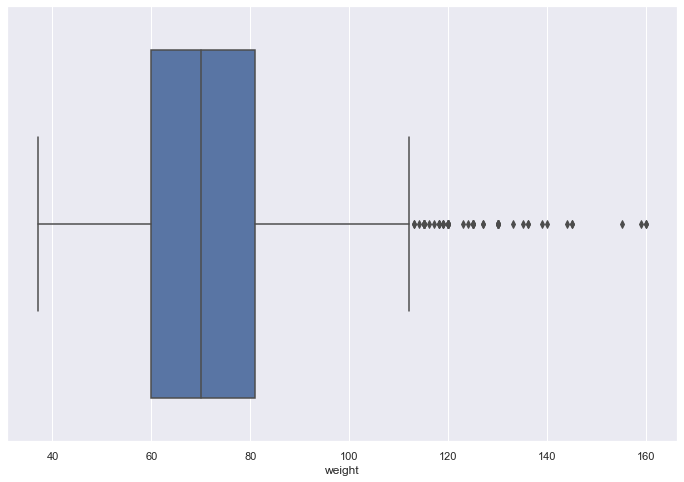

In [16]:
# boxplot
sns.boxplot(x=amostra2)

A distribuição da variável é assimética à direita, o que faz sentido com o resultado do teste de normalidade.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [17]:
def q4():
    # gera amostra
    amostra2 = get_sample(athletes, "weight", n=3000)
    
    # transformação logaritmica
    log_amostra2 = amostra2.apply(np.log)
    
    # realiza o teste de D'Agostino-Pearson
    teste = sct.normaltest(log_amostra2)
    
    # obtem o resultado
    if (teste[1] < 0.05):
        resultado = False
    else:
        resultado = True
    
    return resultado
    pass

In [18]:
# testa a função
q4()

False

In [19]:
# resultado do teste
log_amostra2 = amostra2.apply(np.log)
sct.normaltest(log_amostra2)

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)

A transformação logarítmica da variável também não apresenta distribuição Normal, de acordo com o teste.

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

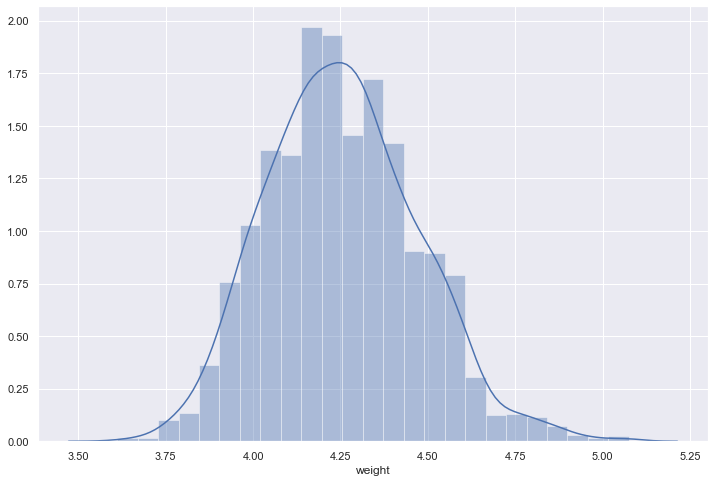

In [20]:
# histograma
sns.distplot(log_amostra2, bins=25)

A distribuição da variável após a tranformação parece mais com a distribuição Normal e, portanto, esperava um resultado diferente.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [21]:
# separa atletas por país e remove NAs
bra = athletes.loc[athletes['nationality']=='BRA', 'height'].dropna()
usa = athletes.loc[athletes['nationality']=='USA', 'height'].dropna()
can = athletes.loc[athletes['nationality']=='CAN', 'height'].dropna()

In [22]:
def q5():
    # realiza o teste
    teste = sct.ttest_ind(bra, usa, equal_var=False)
    
    # resultado do teste
    if (teste[1] < 0.05):
        resultado = False
    else:
        resultado = True
        
    return resultado
    pass

In [23]:
# testa a função
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [24]:
def q6():
    # realiza o teste
    teste = sct.ttest_ind(bra, can, equal_var=False)
    
    # resultado do teste
    if (teste[1] < 0.05):
        resultado = False
    else:
        resultado = True
        
    return resultado
    pass

In [25]:
# testa a função
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [26]:
def q7():
    # realiza o teste
    teste = sct.ttest_ind(usa, can, equal_var=False)
    
    # retorna o valor-p
    return float(round(teste[1],8))
    pass

In [27]:
# testa a função
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?